## H2D2 Spectroscopy 
-------------------------------

Daniel Mazin, Jessica Parades, Adrian Rojas, Aidan Garcia

In [90]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.stats as stats

def fgaussian(x, A, B, C, D):
    return A * np.exp(-((x - B) ** 2) / (2 * C ** 2)) + D

def is_float(string): 
    try:
        float(string)
        return True
    except ValueError:
        return False

def fit_and_plot_gaussian(x_data, y_data, initial_guess):

    # Perform the curve fitting
    params, covariance = curve_fit(fgaussian, x_data, y_data, p0=initial_guess)
    A_fit, B_fit, C_fit, D_fit = params
    uncertainties = np.sqrt(np.diag(covariance))

    # Plotting the data and the fit
    plt.figure(figsize=(8, 6))
    plt.xlabel('Wavelength')  
    plt.ylabel('Current')
    plt.plot(x_data, y_data, 'ro', ms=6, label='Data')
    plt.plot(x_data, fgaussian(x_data, *params), 'b--', linewidth=2, label='Best Fit')
    plt.legend()
    plt.show()

    # Print the fitting parameters
    print(f'Fit Parameters:\nA = {A_fit:.4f} ± {uncertainties[0]:.4f}\n'
          f'B = {B_fit:.4f} ± {uncertainties[1]:.4f}\n'
          f'C = {C_fit:.4f} ± {uncertainties[2]:.4f}\n'
          f'D = {D_fit:.4f} ± {uncertainties[3]:.4f}')

datam = np.genfromtxt('DATA_MERCURY.csv', delimiter=',', dtype=str, encoding='utf-8-sig')

data1 =  np.genfromtxt('DATA_N1.csv', delimiter=',', dtype=str)

data2 =  np.genfromtxt('DATA_N2.csv', delimiter=',', dtype=str)

data3 =  np.genfromtxt('DATA_N3.csv', delimiter=',', dtype=str)

data4 =  np.genfromtxt('DATA_N4.csv', delimiter=',', dtype=str)

# split columns from data into x and y values 
x_data_m = [float(row[0]) if is_float(row[0]) else np.nan for row in datam]
y_data_m = [float(row[1]) if is_float(row[1]) else np.nan for row in datam]

x_data_1 = [float(row[0]) if is_float(row[0]) else np.nan for row in data1]
y_data_1 = [float(row[1]) if is_float(row[1]) else np.nan for row in data1]

x_data_2 = [float(row[0]) if is_float(row[0]) else np.nan for row in data2]
y_data_2 = [float(row[1]) if is_float(row[1]) else np.nan for row in data2]

x_data_3 = [float(row[0]) if is_float(row[0]) else np.nan for row in data3]
y_data_3 = [float(row[1]) if is_float(row[1]) else np.nan for row in data3]

x_data_4 = [float(row[0]) if is_float(row[0]) else np.nan for row in data4]
y_data_4 = [float(row[1]) if is_float(row[1]) else np.nan for row in data4]

#### Mercury Calibration

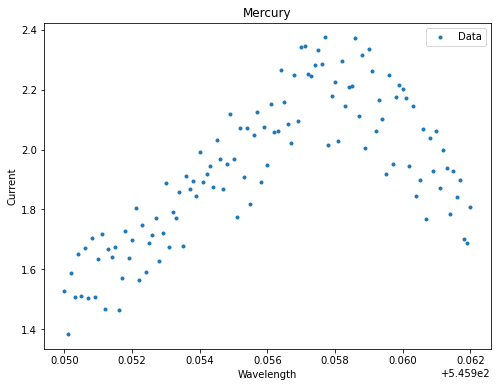

In [91]:
# plot all data 

plt.figure(figsize=(8, 6))
plt.scatter(x_data_m, y_data_m, label='Data', marker='.')
plt.xlabel('Wavelength')
plt.ylabel('Current')
plt.title('Mercury')
plt.legend()
plt.show()

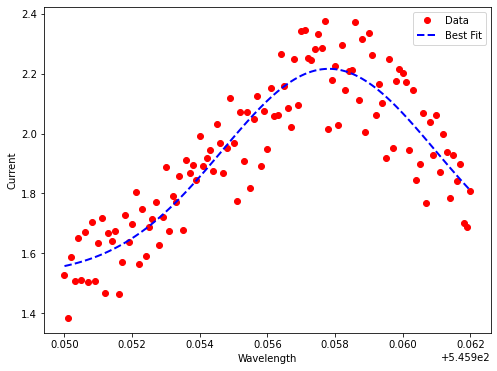

Fit Parameters:
A = 0.6903 ± 0.0415
B = 545.9578 ± 0.0001
C = 0.0031 ± 0.0002
D = 1.5259 ± 0.0438


In [92]:
initial_guess = [2.4, 545.959, .004, 1.4]
fit_and_plot_gaussian(np.array(x_data_m), np.array(y_data_m), initial_guess)

### N3 Orbital

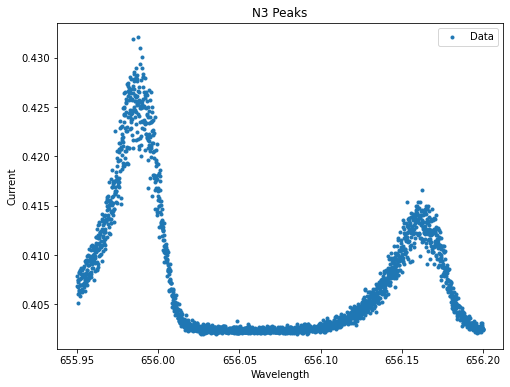

In [93]:
plt.figure(figsize=(8,6))
plt.scatter(x_data_1, y_data_1, label='Data', marker='.')
plt.xlabel('Wavelength')
plt.ylabel('Current')
plt.title('N3 Peaks')
plt.legend()
plt.show() 

### Deuterium Peak

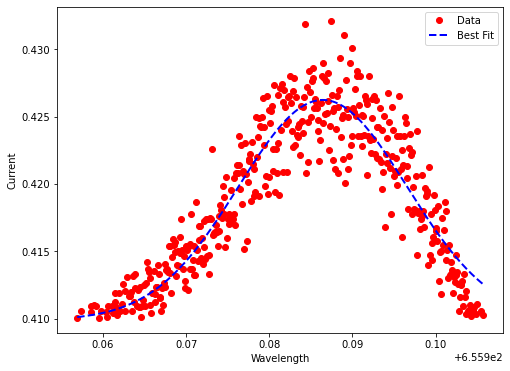

Fit Parameters:
A = 0.0164 ± 0.0004
B = 655.9864 ± 0.0001
C = 0.0101 ± 0.0003
D = 0.4099 ± 0.0005


In [94]:
paired_data_1p1 = [(x, y) for x, y in zip(x_data_1, y_data_1) if x <= 656.06]
filtered_data_1p1 = [(x, y) for x, y in paired_data_1p1 if y >= 0.41]

x_data_1_p1, y_data_1_p1 = zip(*filtered_data_1p1)
x_data_1p1 = np.array(x_data_1_p1)
y_data_1p1 = np.array(y_data_1_p1)

initial_guess = [0.43, 655.99, .006, 0.406]
fit_and_plot_gaussian(x_data_1p1, y_data_1p1, initial_guess)

### Hydrogen Peak

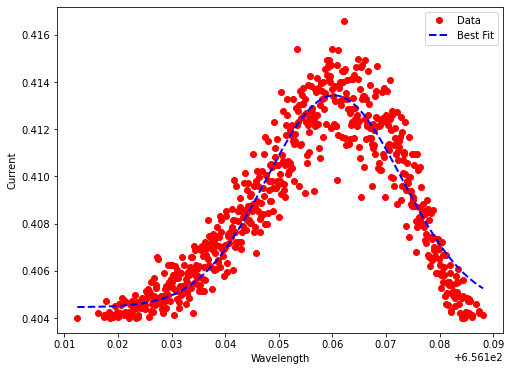

Fit Parameters:
A = 0.0090 ± 0.0001
B = 656.1603 ± 0.0001
C = 0.0126 ± 0.0003
D = 0.4045 ± 0.0001


In [95]:
paired_data_1p2 = [(x, y) for x, y in zip(x_data_1, y_data_1) if x > 656.06]
filtered_data_1p2 = [(x, y) for x, y in paired_data_1p2 if y >= 0.404]

x_data_1_p2, y_data_1_p2 = zip(*filtered_data_1p2)
x_data_1p2 = np.array(x_data_1_p2)
y_data_1p2 = np.array(y_data_1_p2)

initial_guess_2 = [0.41, 656.16, .006, 0.402]
fit_and_plot_gaussian(x_data_1p2, y_data_1p2, initial_guess_2)

### N4 Orbital

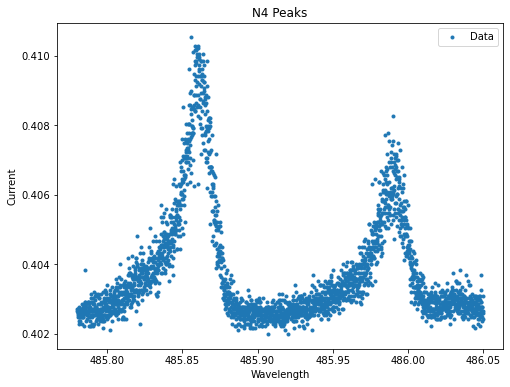

In [96]:
plt.figure(figsize=(8,6))
plt.scatter(x_data_2, y_data_2, label='Data', marker='.')
plt.xlabel('Wavelength')
plt.ylabel('Current')
plt.title('N4 Peaks')
plt.legend()
plt.show()

### Deuterium Peak

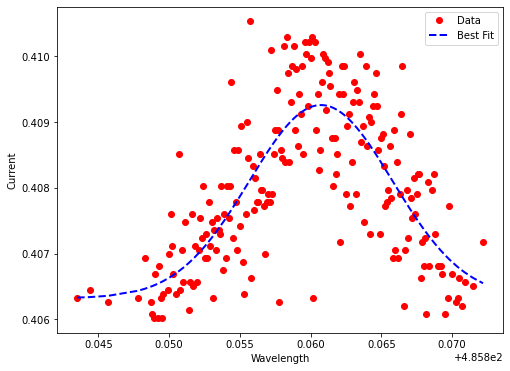

Fit Parameters:
A = 0.0029 ± 0.0002
B = 485.8607 ± 0.0002
C = 0.0051 ± 0.0005
D = 0.4063 ± 0.0002


In [97]:
paired_data_2p1 = [(x, y) for x, y in zip(x_data_2, y_data_2) if x < 485.92]
filtered_data_2p1 = [(x, y) for x, y in paired_data_2p1 if y >= 0.406]

x_data_2_p1, y_data_2_p1 = zip(*filtered_data_2p1)
x_data_2p1 = np.array(x_data_2_p1)
y_data_2p1 = np.array(y_data_2_p1)

initial_guess = [0.42, 485.86, .004, 0.402]
fit_and_plot_gaussian(x_data_2p1, y_data_2p1, initial_guess)

### Hydrogen Peak

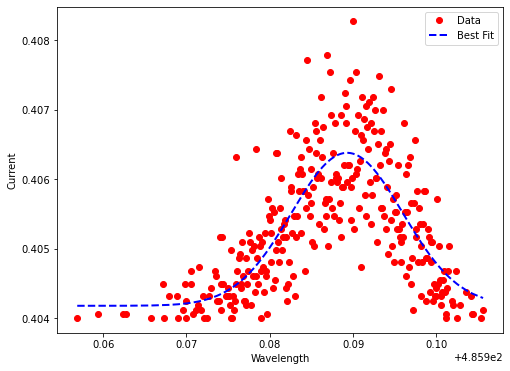

Fit Parameters:
A = 0.0022 ± 0.0001
B = 485.9893 ± 0.0002
C = 0.0067 ± 0.0005
D = 0.4042 ± 0.0001


In [98]:
paired_data_2p2 = [(x, y) for x, y in zip(x_data_2, y_data_2) if x > 485.95]
filtered_data_2p2 = [(x, y) for x, y in paired_data_2p2 if y >= 0.404]

x_data_2_p2, y_data_2_p2 = zip(*filtered_data_2p2)
x_data_2p2 = np.array(x_data_2_p2)
y_data_2p2 = np.array(y_data_2_p2)

initial_guess = [0.41, 485.99, .006, 0.402]
fit_and_plot_gaussian(x_data_2p2, y_data_2p2, initial_guess)

### N5 Orbital

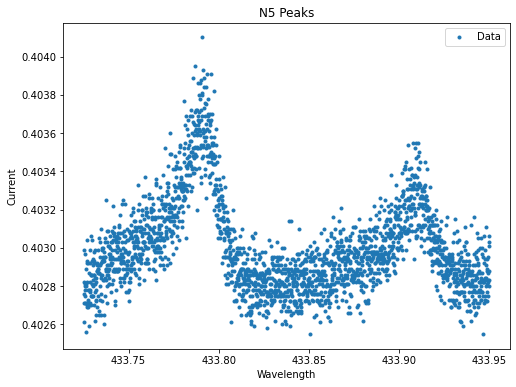

In [99]:
plt.figure(figsize=(8,6))
plt.scatter(x_data_3, y_data_3, label='Data', marker='.')
plt.xlabel('Wavelength')
plt.ylabel('Current')
plt.title('N5 Peaks')
plt.legend()
plt.show()

### Deuterium Peak

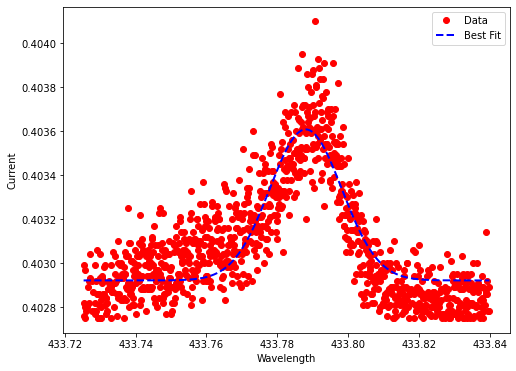

Fit Parameters:
A = 0.0007 ± 0.0000
B = 433.7880 ± 0.0002
C = 0.0102 ± 0.0002
D = 0.4029 ± 0.0000


In [100]:
paired_data_3p1 = [(x, y) for x, y in zip(x_data_3, y_data_3) if x < 433.84]
filtered_data_3p1 = [(x, y) for x, y in paired_data_3p1 if y >= 0.40275]

x_data_3_p1, y_data_3_p1 = zip(*filtered_data_3p1)
x_data_3p1 = np.array(x_data_3_p1)
y_data_3p1 = np.array(y_data_3_p1)

initial_guess = [0.4039, 433.78, .004, 0.4025]
fit_and_plot_gaussian(x_data_3p1, y_data_3p1, initial_guess)

### Hydrogen Peak

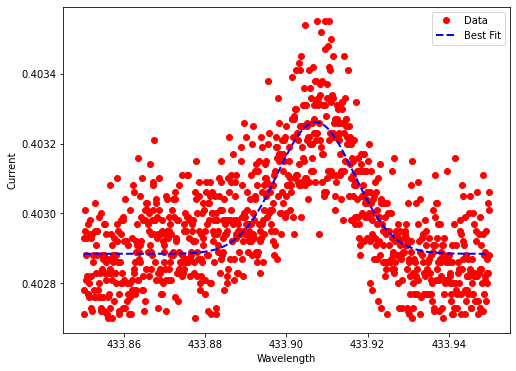

Fit Parameters:
A = 0.0004 ± 0.0000
B = 433.9072 ± 0.0003
C = 0.0094 ± 0.0004
D = 0.4029 ± 0.0000


In [101]:
paired_data_3p2 = [(x, y) for x, y in zip(x_data_3, y_data_3) if x > 433.85]
filtered_data_3p2 = [(x, y) for x, y in paired_data_3p2 if y >= 0.4027]

x_data_3_p2, y_data_3_p2 = zip(*filtered_data_3p2)
x_data_3p2 = np.array(x_data_3_p2)
y_data_3p2 = np.array(y_data_3_p2)

initial_guess = [0.41, 433.91, .006, 0.402]
fit_and_plot_gaussian(x_data_3p2, y_data_3p2, initial_guess)

### N6 Orbital

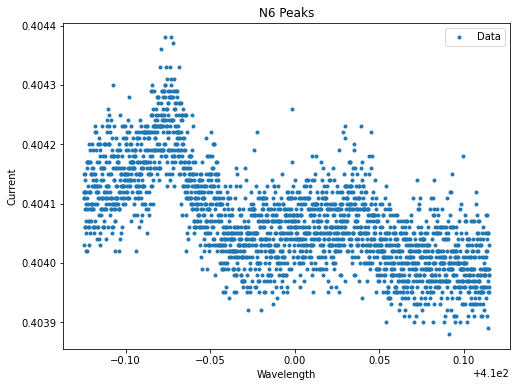

In [102]:
plt.figure(figsize=(8,6))
plt.scatter(x_data_4, y_data_4, label='Data', marker='.')
plt.xlabel('Wavelength')
plt.ylabel('Current')
plt.title('N6 Peaks')
plt.legend()
plt.show()

### Deuterium Peak

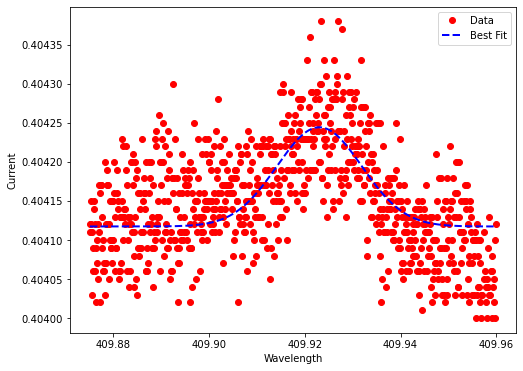

Fit Parameters:
A = 0.0001 ± 0.0000
B = 409.9230 ± 0.0004
C = 0.0089 ± 0.0005
D = 0.4041 ± 0.0000


In [103]:
paired_data_4p1 = [(x, y) for x, y in zip(x_data_4, y_data_4) if x < 409.96]
filtered_data_4p1 = [(x, y) for x, y in paired_data_4p1 if y >= 0.404]

x_data_4_p1, y_data_4_p1 = zip(*filtered_data_4p1)
x_data_4p1 = np.array(x_data_4_p1)
y_data_4p1 = np.array(y_data_4_p1)

initial_guess = [0.40435, 409.93, .004, 0.4040]
fit_and_plot_gaussian(x_data_4p1, y_data_4p1, initial_guess)

### Hydrogen Peak

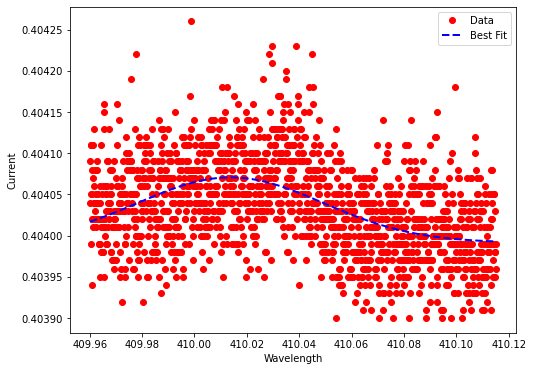

Fit Parameters:
A = 0.0001 ± 0.0000
B = 410.0138 ± 0.0014
C = 0.0355 ± 0.0026
D = 0.4040 ± 0.0000


In [104]:
paired_data_4p2 = [(x, y) for x, y in zip(x_data_4, y_data_4) if x > 409.96]
filtered_data_4p2 = [(x, y) for x, y in paired_data_4p2 if y >= 0.4039]

x_data_4_p2, y_data_4_p2 = zip(*filtered_data_4p2)
x_data_4p2 = np.array(x_data_4_p2)
y_data_4p2 = np.array(y_data_4_p2)

initial_guess = [0.40435, 410.03, .004, 0.40395]
fit_and_plot_gaussian(x_data_4p2, y_data_4p2, initial_guess)

### Plot

$$ \frac{1}{\lambda} = R \biggl(\frac{1}{2^2} -\frac{1}{n^{2}_{i}} \biggr)$$

$$ y = \frac{1}{\lambda} \hspace{1cm} x = \frac{1}{n^{2}_{i}}$$

$$ y = R \biggl(\frac{1}{2^2} -x \biggr) \rightarrow y = \frac{R}{4} - Rx $$

$ \text{Note: Rydberg Constant for an Infinitely Massive Nucleus}$

$$ R_{\infty} = \frac{1}{hc}\frac{E_0}{2} = \frac{1}{2} \frac{1}{hc} a^2 m_ec^2 = \frac{1}{1240 \text{ eV nm}} \frac{1}{137^2}(0.511\times10^6 \text{ eV}) = 0.01097 \text{ nm}^{-1}$$

$\text{Rydberg Constant for Deuterium and Hydrogen:}$

$$ R_D = \frac{\mu_D}{m_e}R_{\infty}$$

$$ R_H = \frac{\mu_H}{m_e}R_{\infty} $$

You can use these to find the reduced mass/electron mass ratio by dividing the specific Rydberg constant by the Rydberg constant for an infinitely massive nucleus.

$$\text{e.g.} \hspace{1cm} R_D = \frac{\mu_D}{m_e}R_{\infty}$$

$$\frac{\mu_D}{m_e} = \frac{R_{D}}{R_{\infty}}$$

$$\frac{R_D}{R_H} = \frac{\frac{\mu_D}{m_e}R_{\infty}}{\frac{\mu_H}{m_e}R_{\infty}} = \frac{\frac{1}{1+\frac{m_e}{M_D}}R_{\infty}}{\frac{1}{1+\frac{m_e}{M_H}}R_{\infty}} = \frac{1+\frac{m_e}{M_H}}{1+\frac{m_e}{M_D}} \approx \biggl(1+\frac{m_e}{M_H}\biggr)\biggl(1-\frac{m_e}{M_D}\biggr) $$

Neglecting second order terms. 

$$ \frac{R_D}{R_H}\approx 1 + m_e \biggr( \frac{1}{M_H} - \frac{1}{M_D}\biggl) = 1 + \frac{m_e}{M_H}\biggl(1 - \frac{M_H}{M_D}\biggr)$$

$$ \frac{m_e}{M_H} \approx \frac{\frac{R_D}{R_H}-1}{1-\frac{M_H}{M_D}}$$

From pre-lab writeup: 

$$ \frac{M_D}{M_H} = 1.999 $$

$$ \frac{m_e}{M_H} \approx \frac{\frac{R_D}{R_H}-1}{1-1.999} = 2.001\biggr( \frac{R_D}{R_H} - 1\biggl) $$

<class 'numpy.ndarray'>
[2.32334048e-10 8.47081678e-10 1.06261427e-09 2.37988562e-09]


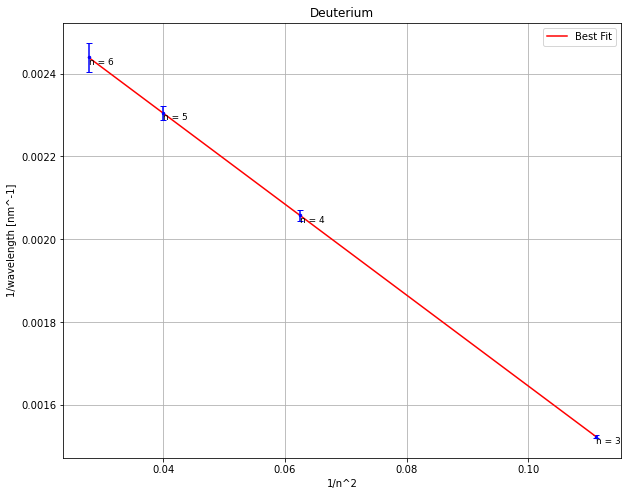

Rydberg constant for Deuterium: 0.010978092
Uncertainty on Rydberg constant: 7.6358887e-07
<class 'numpy.ndarray'>
[2.32210915e-10 8.46633437e-10 1.59304578e-09 8.32591079e-09]


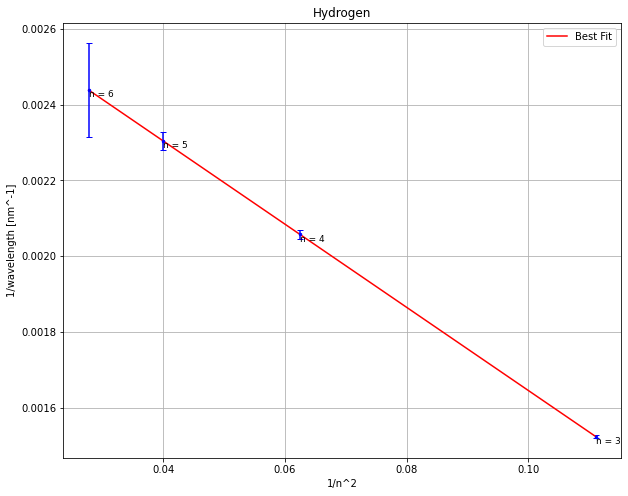

Rydberg constant for Hydrogen: 0.010975924
Uncertainty on Rydberg constant: 1.0888678e-06


LinregressResult(slope=-0.010975923756120356, intercept=0.0027432284466374895, rvalue=-0.9999999901583451, pvalue=9.841654935459639e-09, stderr=1.0888677912631158e-06)

In [105]:
R_inf = 0.0109737316  # Rydberg constant for an infinitely massive nucleus in nm^-1

# Function to process data and perform linear regression
def analyze_data(n, wavelengths, refractive_indices, uncert, title, actual_ratio):
   
    # Construct y values
    y = 1/ (refractive_indices * wavelengths)  # lambda; vacuum
    y_uncert = refractive_indices * uncert # uncertainty; vacuum
    y_err = y_uncert * y ** 2  # Error for inverse wavelength
  
    print (type(y_err))
    print (y_err)

    # Construct x values
    x = 1 / (n ** 2)  # 1/n^2

    # Linear regression
    res = stats.linregress(x, y)

    # Plotting
    plt.figure(figsize=(10, 8))
    plt.errorbar(x, y, y_err*10**4*1.5, fmt='.', color='blue', markersize=5, capsize=3)
    plt.plot(x, res.intercept + res.slope * x, 'r', label='Best Fit')
    for x_val, y_val, label in zip(x, y, ['n = 3', 'n = 4', 'n = 5', 'n = 6']):
        plt.text(x_val, y_val, label, fontsize=9, ha='left', va='top')
    plt.xlabel('1/n^2')
    plt.ylabel('1/wavelength [nm^-1]')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

    # Rydberg constant and error analysis
    R = -res.slope
    print(f'Rydberg constant for {title}: {R:.8g}')
    print(f'Uncertainty on Rydberg constant: {res.stderr:.8g}')

    return res

# Common refractive index array
i_common = np.array([1.000224458, 1.000186905, 1.000228641, 1.000228751])
# Data for Deuterium
n = np.array([3, 4, 5, 6])
ld = np.array([655.9864, 485.8607, 433.7880, 409.9230])
ud = np.array([0.0001, 0.0002, 0.0002, 0.0004])
analyze_data(n, ld, i_common, ud, 'Deuterium', 0.999728)

# Data for Hydrogen
lh = np.array([656.1603, 485.9893, 433.9072, 410.0138])
uh = np.array([0.0001, 0.0002, 0.0003, 0.0014])
analyze_data(n, lh, i_common, uh, 'Hydrogen', 0.999457)

In [106]:
# Extract the Rydberg constants and their uncertainties for Deuterium and Hydrogen
R_D = -results_deuterium.slope
sigma_R_D = results_deuterium.stderr

R_H = -results_hydrogen.slope
sigma_R_H = results_hydrogen.stderr

# Calculate the electron mass-to-hydrogen mass ratio
me_MH_ratio = 2.001 * ((R_D / R_H) - 1)

# Calculate the uncertainty in the ratio
sigma_me_MH_ratio = 2.001 * np.sqrt((sigma_R_D / R_H) ** 2 + (R_D * sigma_R_H / R_H ** 2) ** 2)

# Print the results with 6 significant figures
print(f"Electron mass-to-Hydrogen mass ratio (m_e/M_H): {me_MH_ratio:.5g} ± {sigma_me_MH_ratio:.5g}")

Electron mass-to-Hydrogen mass ratio (m_e/M_H): 0.00039537 ± 0.00024249
